# Task 1 : Set up colab gpu runtime environment

In [1]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

  Obtaining dependency information for segmentation-models-pytorch from https://files.pythonhosted.org/packages/cb/70/4aac1b240b399b108ce58029ae54bc14497e1bbc275dfab8fd3c84c1e35d/segmentation_models_pytorch-0.3.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/58.8 kB ? eta -:--:--
     -------------------------------------- 58.8/58.8 kB 614.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for timm==0.9.2 from https://files.pythonhosted.org/packages/29/90/94f5deb8d76e24a89813aef95e8809ca8fd7414490428480eda19b133d4a/timm-0.9.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/68.5 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/68.5 kB ?

DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\diskcache-5.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\llama_cpp_python-0.1.78-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


  Cloning https://github.com/albumentations-team/albumentations to c:\users\user2\appdata\local\temp\pip-req-build-1splql9s
  Resolved https://github.com/albumentations-team/albumentations to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=126642 sha256=5abacb4a29b1a97e19b80185f235182e22933d3d5b30d357fa0a14f372cc5561
  Stored in directory: C:\Users\user2\AppData\Local\Temp\pip-ephem-wheel-cache-1ijl1f3w\wheels\d8\87\c6\794399113ca308f93f3af45afd7d85eff07615a89a2b799e91
Successfully built albumentations


DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\diskcache-5.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\llama_cpp_python-0.1.78-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations 'C:\Users\user2\AppData\Local\Temp\pip-req-build-1splql9s'


^C
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/05/33/5a6436146bda09c69decc456cfb54f41d52fbcf558fe91e6df7bdde6cce0/opencv_contrib_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB 393.8 kB/s eta 0:01:54
   ---------------------------------------- 0.1/44.8 MB 469.7 kB/s eta 0:01:36
   ---------------------------------------- 0.1/44.8 MB 438.1 kB/s eta 0:01:43
   ---------------------------------------- 0.1/44.8 MB 516.7 kB/s eta 0:01:27
   ---------------------------------------- 0.2/44.8 MB 695.5 kB/s eta 0:01:05
   ---------------------------------------- 0.2/44.8 MB 689.2 kB/s eta 0:01:05
   ---------------------------------------- 0.3/44.8 MB 710.0 kB/s eta 0:01:

DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\diskcache-5.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\nlp 1\venv\lib\site-packages\llama_cpp_python-0.1.78-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


# Download Dataset

original author of the dataset :
https://github.com/VikramShenoy97/Human-Segmentation-Dataset


In [2]:
!git clone https://github.com/parth1620/Human-Segmentation-Dataset-master.git

Cloning into 'Human-Segmentation-Dataset-master'...


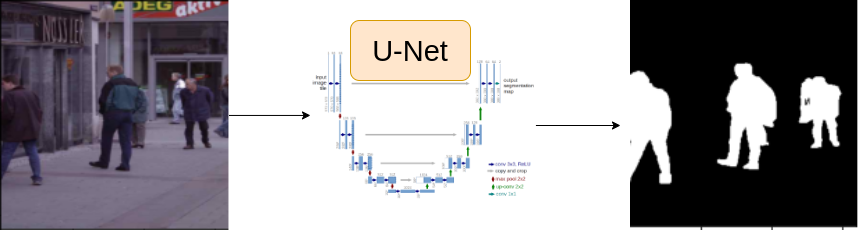

# Some Common Imports

In [ ]:
import sys
sys.path.append('/content/Human-Segmentation-Dataset-master')

In [57]:
import os  #I_added
os.environ['CUDA_VISIBLE_DEVICES'] ='0'  #I_added

In [ ]:
#I_added
#TPU settings
# !pip install cloud-tpu-client==0.10

In [67]:
#I_added
#TPU settings
# import torch_xla
# import torch_xla.core.xla_model as xm

# import os
# assert os.environ['COLAB_TPU_ADDR']

# DEVICE = xm.xla_device()

ModuleNotFoundError: No module named 'torch_xla'

In [214]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

pd.options.display.max_colwidth = 100

In [69]:
def show_image(image,mask,pred_image = None):
    
    if pred_image == None:
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
    elif pred_image != None :
        
        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask.permute(1,2,0).squeeze(),cmap = 'gray')
        
        ax3.set_title('MODEL OUTPUT')
        ax3.imshow(pred_image.permute(1,2,0).squeeze(),cmap = 'gray')

# Task : 2 Setup Configurations

In [159]:
CSV_FILE = r"C:\Users\user2\Desktop\GitRepos\Object-Detection-Sat\Human-Segmentation-Dataset-master/train.csv"
# DATA_DIR = r"C:\Users\user2\Desktop\GitRepos\Object-Detection-Sat"

DEVICE = 'cpu'
# DEVICE = 'cuda'
# DEVICE = xm.xla_device()  #I_added

EPOCHS = 25
LR = 0.003
IMG_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [197]:
df = pd.read_csv(CSV_FILE)
print("Dataframe size: ", df.shape[0])
df.head()

Dataframe size:  290


,masks,images
0,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
1,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
2,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
3,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
4,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...


In [198]:
anomaly_counter = 0
corrupted_idxs = []
for idx in range(df.shape[0]):
    image_size = cv2.imread(df.iloc[idx].images).shape
    mask_size = cv2.imread(df.iloc[idx].masks).shape
    if image_size != mask_size:
        anomaly_counter += 1
        corrupted_idxs.append(idx)
print(f"{anomaly_counter} number of masks don't match their corresponding images shape")

df.drop(corrupted_idxs, inplace=True)

print(f'corrupted data dropped out of dataframe, df now has {df.shape[0]} indices')
df

198 number of masks don't match their corresponding images shape
corrupted data dropped out of dataframe, df now has 92 indices


,masks,images
0,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
1,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
4,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
5,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
6,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
...,...,...
277,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
279,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
281,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
286,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...


In [199]:
row = df.iloc[2]

image_path = row.images
mask_path = row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) / 255.0

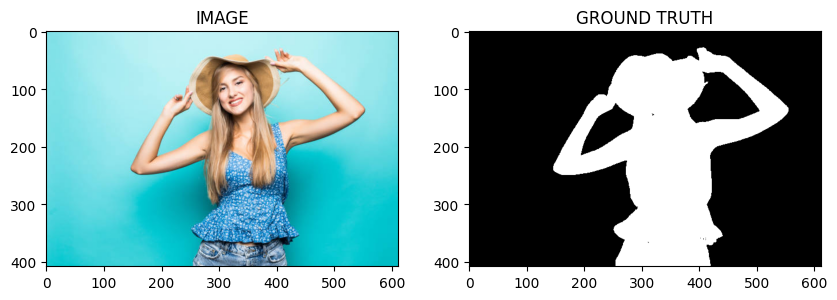

In [200]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

In [218]:
print(df.iloc[[2]].images)

4    Human-Segmentation-Dataset-master/Training_Images/102.jpg
Name: images, dtype: object


In [219]:
train_df, valid_df = train_test_split (df, test_size=0.2, random_state=42)

In [233]:
idx = 15
print(cv2.imread(df.iloc[idx].images).shape)
print(cv2.imread(df.iloc[idx].masks).shape)

(480, 640, 3)
(480, 640, 3)


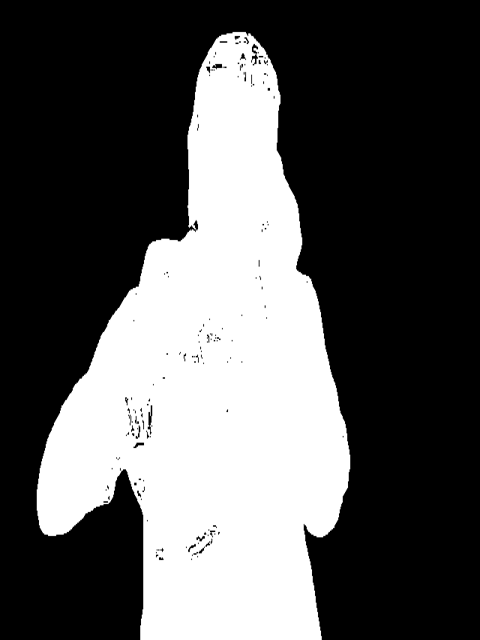

In [234]:
from PIL import Image

image = Image.open(df.iloc[idx].masks)
new_image = image.resize(cv2.imread(df.iloc[idx].images, cv2.IMREAD_GRAYSCALE).shape)
new_image

# Task 3 : Augmentation Functions

albumentation documentation : https://albumentations.ai/docs/

In [235]:
import albumentations as A

In [236]:
def get_train_augs():
  return A.Compose([
      A.Resize(IMG_SIZE, IMG_SIZE),
      A.HorizontalFlip(p=0.5),
      A.VerticalFlip(p=0.5)
  ]
      ,is_check_shapes=False
  )

def get_valid_augs():
  return A.Compose([
      A.Resize(IMG_SIZE, IMG_SIZE)
  ])

# Task 4 : Create Custom Dataset

In [237]:
from torch.utils.data import Dataset

In [238]:
class SegmentationDataset(Dataset):

  def __init__(self, df, augmentations):
    self.df = df
    self.augmentations = augmentations


  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    row = self.df.iloc[idx]

    image_path = row.images
    mask_path = row.masks

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) #(h, w)
    mask = np.expand_dims(mask, axis = -1) #(h, w, c)

    if self.augmentations:
      data = self.augmentations(image = image , mask = mask)
      image = data['image']
      mask = data['mask']

    #(h, w, c) -> (c, h, w)
    image = np.transpose(image, (2,0,1)).astype(np.float32)
    mask = np.transpose(mask, (2,0,1)).astype(np.float32)

    image = torch.Tensor(image) / 255.0
    mask = torch.round(torch.Tensor(mask) / 255.0)

    return image, mask

In [239]:
trainset = SegmentationDataset(train_df, get_train_augs())
validset = SegmentationDataset(valid_df, get_valid_augs())

In [240]:
print(f"Size of Trainset : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

Size of Trainset : 73
Size of Validset : 19


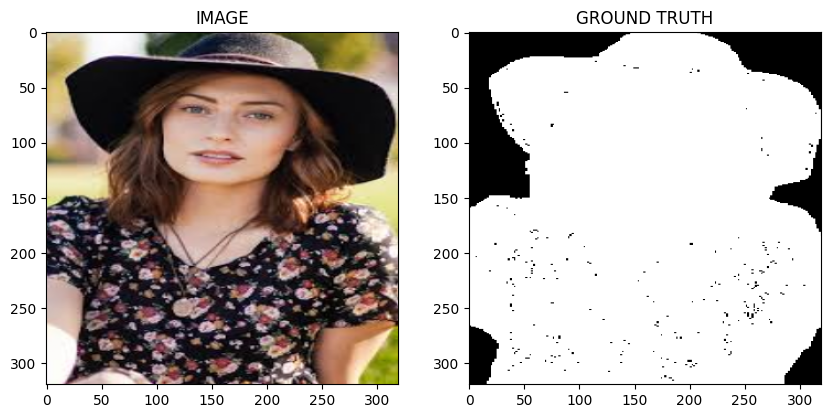

In [241]:
idx = 3

image, mask = trainset[idx]
show_image(image, mask)

In [242]:
idx = 20
print(trainset[idx][0].shape)
print(trainset[idx][1].shape)

torch.Size([3, 320, 320])
torch.Size([1, 320, 320])


# Task 5 : Load dataset into batches

In [243]:
from torch.utils.data import DataLoader

In [244]:
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle = True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE)

print("Total no. of batches in trainloader: ", len(trainloader))
print("Total no. of batches in validloader: ", len(validloader))

Total no. of batches in trainloader:  5
Total no. of batches in validloader:  2


In [245]:
for image, mask in trainloader:
  break

print(f"One batch image shape : {image.shape}")
print(f"One batch mask shape : {mask.shape}")

One batch image shape : torch.Size([16, 3, 320, 320])
One batch mask shape : torch.Size([16, 1, 320, 320])


# Task 6 : Create Segmentaion Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [246]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [247]:
class SegmentationModel(nn.Module):

  def __init__(self):
    super(SegmentationModel, self).__init__()

    self.arc = smp.Unet(
        encoder_name = ENCODER,
        encoder_weights = WEIGHTS,
        in_channels=3,
        classes= 1,
        activation=None
    )

  def forward(self, images, masks = None):
    images = images.to(DEVICE) #I_added
    logits = self.arc(images)

    if mask != None:
      loss1 = DiceLoss(mode='binary')(logits, mask)
      loss2 = nn.BCEWithLogitsLoss()(logits, mask)

      return logits, loss1 + loss2
    return logits

In [248]:
model = SegmentationModel()
model.to(DEVICE);

In [249]:
model;

In [250]:
#I_added
# from accelerate import dispatch_model, infer_auto_device_map
# from accelerate.utils import get_balanced_memory

# max_memory = get_balanced_memory(
#     model,
#     max_memory=None,
#     no_split_module_classes=["GPTNeoXLayer", "GPTNeoXMLP"],
#     dtype='float16',
#     low_zero=False,
# )

# device_map = infer_auto_device_map(
#     model,
#     max_memory=max_memory,
#     no_split_module_classes=["GPTNeoXLayer", "GPTNeoXMLP"],
#     dtype='float16'
# )

# model = dispatch_model(model, device_map=device_map)

# Task 7 : Create Train and Validation Function

In [251]:
def train_fn(dataloader, model, optimizer):
  model.train()  #to use dropout and batch-norm
  total_loss = 0.0

  for images, mask in tqdm(dataloader):
    images = images.to(DEVICE)
    mask = mask.to(DEVICE)

    optimizer.zero_grad()
    logits, loss = model(images, mask)
    loss.backward()   #gradinets computing
    optimizer.step()  #weights updating

    total_loss += loss.item()

  return total_loss / len(data_loader)

In [252]:
def eval_fn(dataloader, model):
  model.eval()
  total_loss = 0.0

  with torch.no_grad():
    for images, mask in tqdm(dataloader):
      images = images.to(DEVICE)
      mask = mask.to(DEVICE)

      logits, loss = model(images, mask)

      total_loss += loss.item()

  return total_loss / len(data_loader)

# Task 8 : Train Model

In [253]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [254]:
best_valid_loss = np.Inf

for i in range(EPOCHS):
  train_loss = train_fn(trainloader, model, optimizer)
  valid_loss = eval_fn(validloader, model)

  if valid_loss < best_valid_loss:
    torch.save(model.statedict(), 'best_model.pt')
    print("MODEL-SAVED")
    best_valid_loss = valid_loss

  print(f"Epoch: {i+1}    Train_loss: {train_loss}    Valid_loss: {valid_loss}")

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:20<00:20, 20.11s/it]


AssertionError: 

# Task 9 : Inference

# For updates about upcoming and current guided projects follow me on...

Twitter : @parth_AI

Linkedin : www.linkedin.com/in/pdhameliya